# **Heart disease Prediction using Deep neural network**




















## **Context**


---
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.



## **Problem Statement**: 

---



To predict if the patient will have a heart disease or not





## **Attribute Information :**

|Features|Description|
|-----|-----|
|1. age|(in years)|
|2. sex:| (1 = male; 0 = female)|
|3. cp: | chest pain type|
|4. trestbps:| resting blood pressure (in mm Hg on admission to the                     | hospital)|
|5. chol:    |    serum cholestoral in mg/dl|
|6. fbs:     |(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
|7. restecg: | resting electrocardiographic results|
|8. thalach: | maximum heart rate achieved |
|9. exang:   |exercise induced angina (1 = yes; 0 = no)
|10. oldpeak:|ST depression induced by exercise relative to rest|
|11. slope:  |the slope of the peak exercise ST segment|
|12. ca:     |number of major vessels (0-3) colored by flourosopy|
|13. thal:   |3 = normal; 6 = fixed defect; 7 = reversable defect|
|14. target: | 1 or 0                                            |

## **Importing All Required Libraries**

---






In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphss
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Find unique values

In [5]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='int64':
                print(f'{column}: {df[column].unique()}') 

In [6]:

#print_unique_col_values(df)

In [7]:
df.shape

(1025, 14)

#Get dummmies for various variables

In [8]:
df = pd.concat([df,pd.get_dummies(df['sex'],prefix="sex")],axis=1)
df.drop('sex', axis=1, inplace=True)
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_0,sex_1
0,52,0,125,212,0,1,168,0,1.00,2,2,3,0,0,1
1,53,0,140,203,1,0,155,1,3.10,0,0,3,0,0,1
2,70,0,145,174,0,1,125,1,2.60,0,0,3,0,0,1
3,61,0,148,203,0,1,161,0,0.00,2,1,3,0,0,1
4,62,0,138,294,1,1,106,0,1.90,1,3,2,0,1,0


In [9]:
df.shape

(1025, 15)

In [10]:
df = pd.concat([df,pd.get_dummies(df['cp'],prefix="cp")],axis=1)
df.drop('cp', axis=1, inplace=True)



df = pd.concat([df,pd.get_dummies(df['fbs'],prefix="fbs")],axis=1)
df.drop('fbs', axis=1, inplace=True)


df = pd.concat([df,pd.get_dummies(df['restecg'],prefix="restecg")],axis=1)
df.drop('restecg', axis=1, inplace=True)




df = pd.concat([df,pd.get_dummies(df['exang'],prefix="exang")],axis=1)
df.drop('exang', axis=1, inplace=True)




df = pd.concat([df,pd.get_dummies(df['slope'],prefix="slope")],axis=1)
df.drop('slope', axis=1, inplace=True)



df = pd.concat([df,pd.get_dummies(df['ca'],prefix="ca")],axis=1)
df.drop('ca', axis=1, inplace=True)


df = pd.concat([df,pd.get_dummies(df['thal'],prefix="thal")],axis=1)
df.drop('thal', axis=1, inplace=True)

In [11]:
df.shape

(1025, 31)

In [12]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.00,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.10,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.60,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.00,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.90,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### Balance or imbalance

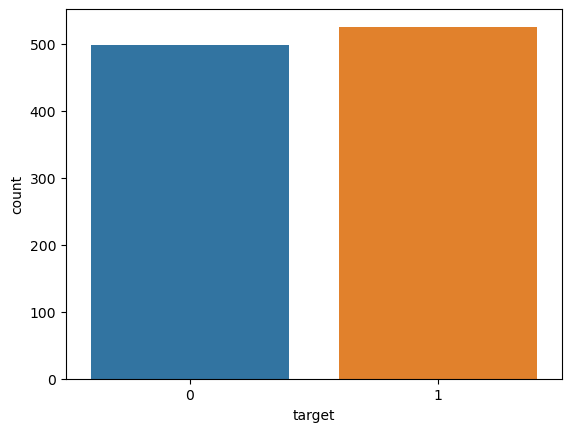

In [13]:
sns.countplot(x ='target', data = df)
plt.show()

In [14]:
df['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [15]:
x_columns = df.columns.drop('target')
X = df[x_columns].values
y = df['target'].values

In [16]:
X.shape

(1025, 30)

In [17]:
y.shape

(1025,)

In [18]:
# if using softmax
y = to_categorical(y)
y.shape

(1025, 2)

In [19]:
y[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Data split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Define model

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(2, activation='softmax'))

In [22]:
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(250, activation="relu"))
model.add(Dense(350, activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(2, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               3100      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 250)               25250     
                                                                 
 dense_7 (Dense)             (None, 350)               87850     
                                                                 
 dense_8 (Dense)             (None, 150)               52650     
                                                                 
 dense_9 (Dense)             (None, 2)                 302       
                                                                 
Total params: 179,252
Trainable params: 179,252
Non-tr

## Compile model

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit the model

In [25]:
history = model.fit(X_train, y_train, epochs=300, batch_size=64)
#history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300)

Epoch 1/300
13/13 [==============================] - 1s 5ms/step - loss: 3.4348 - accuracy: 0.5110
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.8797 - accuracy: 0.5646
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.6073
Epoch 4/300
13/13 [==============================] - 0s 3ms/step - loss: 0.6210 - accuracy: 0.6463
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6118 - accuracy: 0.6500
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5904 - accuracy: 0.6695
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.6927
Epoch 8/300
13/13 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.6829
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 0.5508 - accuracy: 0.7122
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5630 - accuracy: 0.7122
Epoch 11/

## Plot acc and loss

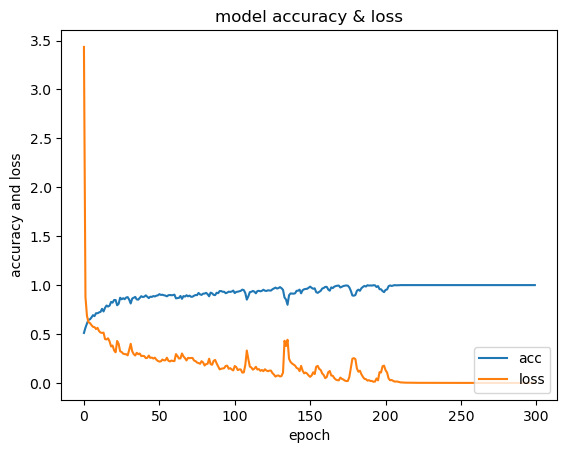

In [26]:
#Visualize the models accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

# Calculate prediction

In [27]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 4ms/step


In [28]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.9805


[0.3229868412017822, 0.9804878234863281]

In [29]:
#pred_test= model.predict(X_test)
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(score[1], 1 - score[1]))  

Accuracy on test data: 0.9804878234863281% 
 Error on test data: 0.019512176513671875


# Confusion matrix

*   Converting predictions to label





In [30]:
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [31]:
print(confusion_matrix(pred,test))

[[105   0]
 [  4  96]]


In [32]:
rep = classification_report(test, pred) 
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       109
           1       0.96      1.00      0.98        96

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

